In [1]:
import warnings
warnings.filterwarnings("ignore")

import random
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

### 시각화
- PassengerId int64  승객 id
- Survived int64     생존 여부, 0:사망, 1: 생존
- Pclass int64         티켓등급: 1등석, 2등석, 3등석
- Name object       성명
- Sex object          성별
- Age float64         나이
- SibSp int64         승선중인 형제나 배우자의 수
- Parch int64         승선중인 부모나 자녀의 수     
- Ticket object       티케 번호
- Fare float64         티켓 요금
- Cabin object        방 번호 
- Embarked object  승선한 항구의 이름 C: Cherbourg, Q:Queenstown(Cobh), S: Southampton

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
# 승선한 항구의 이름, 생존여부, 승객 id를 이용하여 train_df2를 생성 할 것.
train_df2 = train_df[['Embarked', 'Survived', 'PassengerId']]
train_df2.head()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5


In [4]:
# 승선한 항구별 생존여부별 인원수를 파악해주세요.
train_df2.groupby(['Embarked', 'Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [5]:
df = train_df2.groupby(['Embarked', 'Survived']).count().unstack() # 행우선
df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

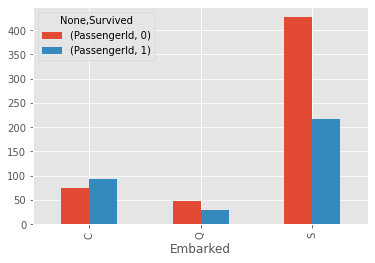

In [6]:
df.plot.bar() # 막대 그래프
plt.show()

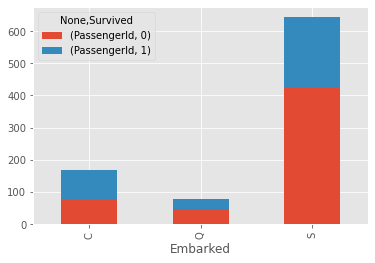

In [7]:
df.plot.bar(stacked=True) # 누적 막대 그래프
plt.show()

In [8]:
df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

In [9]:
# 탑승 항구별 생존자 비율
df.iloc[:, 1] / (df.iloc[:, 0] + df.iloc[:,1])

Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

In [10]:
# 탑승 항구별 생존자 비율 -> Survived_rate 파생변수로 df에 등록
df['Survived_rate'] = df.iloc[:, 1] / (df.iloc[:, 0] + df.iloc[:,1])
df

PassengerId      Survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

In [11]:
# 재난 상황에서 성별 생존자 수 df2 생성
df2 = train_df[['Sex', 'Survived', 'PassengerId']].groupby(['Sex', 'Survived']).count().unstack()
df2.head()

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

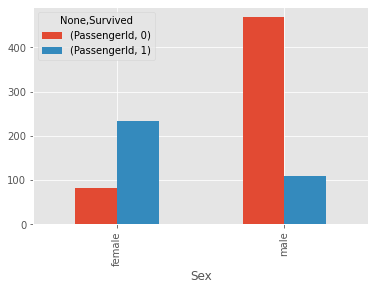

In [12]:
df2.plot.bar()
plt.show()

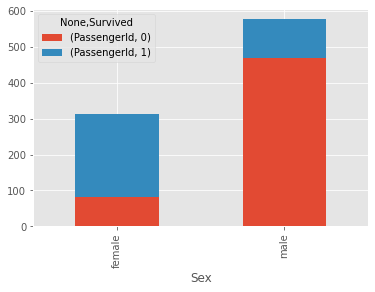

In [13]:
df2.plot.bar(stacked=True)
plt.show()

In [14]:
# Pclass int64 티켓등급: 1등석, 2등석, 3등석
# 티켓등급별 생존자 수
pclass_df = train_df[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().unstack()
pclass_df

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

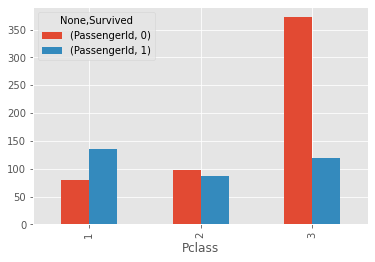

In [15]:
pclass_df.plot.bar()
plt.show()

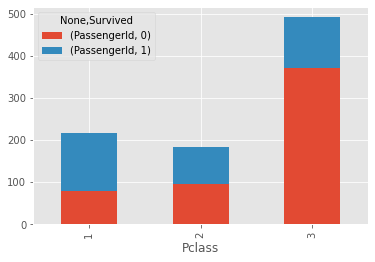

In [16]:
pclass_df.plot.bar(stacked=True)
plt.show() # 1등석에 탑승한 승객들이 가장많이 생존함.

In [17]:
# 현재까지의 분석을 정리하면 생존 확률이 높은 그룹은 1등석에 탑승한 여성 승객이
# 가장 높다.

### Histogram 시각화: 연속 데이터에 대한 시각화(숫자형태, 실수등)

In [18]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [19]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# Age 변수가 NA(NaN, null)이면 삭제
df = train_df[['Age']].dropna()
df.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [22]:
train_df.describe() # 원본 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train_df.head(10) # Age가 NaN인 관측치 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
hist_df = train_df[pd.notnull(train_df['Age'])]
hist_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [25]:
hist_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [26]:
# 생존자와 사망자의 연령별 분포 제작
# 사망자 필터링
hist_df.Survived == 0

0       True
1      False
2      False
3      False
4       True
       ...  
885     True
886     True
887    False
889    False
890     True
Name: Survived, Length: 714, dtype: bool

In [27]:
# 사망자의 나이
hist_df.Age[hist_df.Survived == 0]

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
       ... 
883    28.0
884    25.0
885    39.0
886    27.0
890    32.0
Name: Age, Length: 424, dtype: float64

In [28]:
# 사망자와 생존자의 Age 데이터를 필터링하여 list 생성
data=[hist_df.Age[hist_df.Survived == 0], hist_df.Age[hist_df.Survived == 1]]
data

[0      22.0
 4      35.0
 6      54.0
 7       2.0
 12     20.0
        ... 
 883    28.0
 884    25.0
 885    39.0
 886    27.0
 890    32.0
 Name: Age, Length: 424, dtype: float64,
 1      38.0
 2      26.0
 3      35.0
 8      27.0
 9      14.0
        ... 
 875    15.0
 879    56.0
 880    25.0
 887    19.0
 889    26.0
 Name: Age, Length: 290, dtype: float64]

In [29]:
# data.describe() # X
# np.array(data).describe() # X
data_df = pd.DataFrame(data).T
data_df.columns=['0', '1']
data_df

,0,1
0,22.0,NaN
1,NaN,38.0
2,NaN,26.0
3,NaN,35.0
4,35.0,NaN
...,...,...
885,39.0,NaN
886,27.0,NaN
887,NaN,19.0
889,NaN,26.0


In [30]:
data_df.describe() # 나이가 존재하는 관측치의 기술 통계

,0,1
count,424.000000,290.000000
mean,30.626179,28.343690
std,14.172110,14.950952
min,1.000000,0.420000
25%,21.000000,19.000000
50%,28.000000,28.000000
75%,39.000000,36.000000
max,74.000000,80.000000


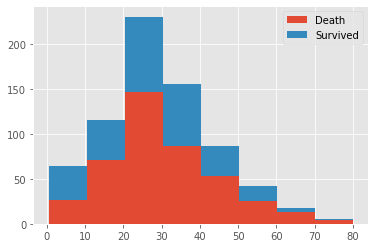

In [31]:
plt.hist(x=data_df, bins=8, label=['Death', 'Survived'], histtype='barstacked')
plt.legend()
plt.show()

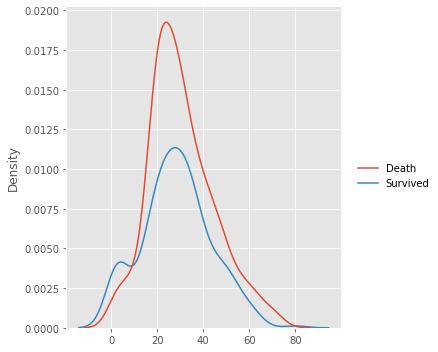

In [32]:
data_df.columns=['Death', 'Survived']
sns.displot(data_df, kind='kde') # 확률 밀도 함수 그래프

In [33]:
# 상관 분석
train_corr = train_df.corr() # object 타입 변수는 자동 제외됨
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


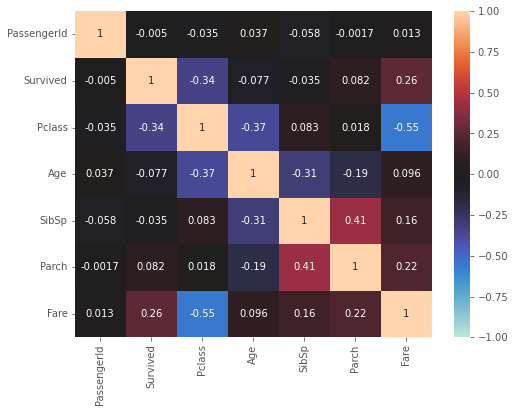

In [34]:
plt.figure(figsize=(8, 6))
# 상관분석: -1 ~ +1
# vmax: 최댓갑, vmin: 최솟값, center: 중앙값, annot: 값 출력
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)
plt.show()
# Y: Survived, X: Survived는 자기자신임으로 1
# Y: Survived, X: Pclass의 상관 계수는 -0.34임으로 음의 상관임으로
#                 Pclass가 증가할 수록 Survived는 감소한다.  
#                 티켓등급이 높아질(1 -> 3) 수록 생존률은 낮아진다.
# Survived
#         ↘
#          ↘   
#           ↘
# Pclsss →→→
# Y: Pclass, X: Fare: -0.55 Fare가 증가할 수록 Pclass는 떨어진다.
# 요금이 고가일 수록 등급은 3 -> 2 -> 1등급으로 높아진다.

In [35]:
# 성별이 생존여부와 어떤 상관관계가 있는지 분석하세요.
# 성별이 생존여부에 영향을 주었는지 파악
train_df.info() # object 타입은 상관분석에서 제외됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
# object -> vector(수치화)
train_df_corr = pd.get_dummies(train_df, columns=['Sex']) 
train_df_corr.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0


In [37]:
train_df_corr.rename(columns={'Sex_female': 'female', 'Sex_male':'male'}, inplace=True)

In [38]:
train_df_corr.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0


In [39]:
# dummy 변수로 변경된 성별을 이용하여 상관분석 진행
train_corr2 = train_df_corr.corr() 
train_corr2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333
female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000
male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000


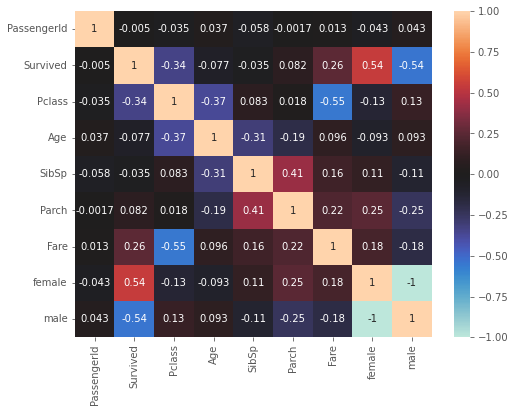

In [40]:
plt.figure(figsize=(8, 6))
# 상관분석: -1 ~ +1
# vmax: 최댓갑, vmin: 최솟값, center: 중앙값, annot: 값 출력
sns.heatmap(train_corr2, vmax=1, vmin=-1, center=0, annot=True)
plt.show()
# Survived: 사망: 0, 생존: 1
# male: 남자(0, 1): -0.54, Survived 0 -> 1로 증가 될수록 남자 생존률은 감소.
# female: 여자(1, 0) 0.54, Survived 0 -> 1로 증가 될수록 여자 생존률은 증가.
# X: female, Y: Survived -> 0.54: female가 0에서 1로 증가될수록 생존율은 증가 
# X: male, Y: Survived -> 0.54: male가 0에서 1로 증가될수록 생존율은 증가
# 논리적으로 문제가 있음: 성별은 하나의 변수인데 2개의 변수가 되면서 해석이 모호함.
#             여자(0 -> 1) 남자(1 -> 0) Survived
# 승객 1 남자:  0,          1             0
# 승객 2 여자:  1,          0             1
# 승객 3 남자:  0,          1             0
# 승객 4 여자:  1,          0             1

# male 기준 판단 -> 1: 남자, 0: 여자
# 남자 1, Survived: 0  <- 남자(음의 상관)
# 남자 0, Survived: 1  <- 여자(양의 상관)

In [41]:
# 성별은 1개의 컬럼으로 표현 가능, 하나의 성질을 2개의 변수로 분리하여
# 해석이 난해해지는 문제의 해결
# 여자 승객: 0, 남자 승객: 1
# object -> vector(수치화), drop_firrst=True: 첫번째 생성된 컬럼 삭제
train_df_corr = pd.get_dummies(train_df, columns=['Sex'], drop_first=True) 
train_df_corr.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [45]:
train_df_corr.rename(columns={'Sex_male':'gender'}, inplace=True)

In [46]:
train_df_corr.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


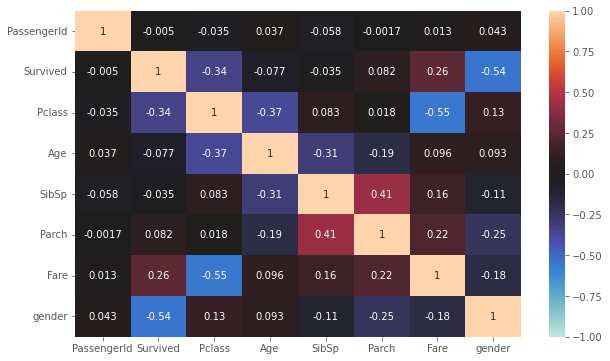

In [51]:
train_corr2 = train_df_corr.corr() 

plt.figure(figsize=(10, 6))
sns.heatmap(train_corr2, vmax=1, vmin=-1, center=0, annot=True)
plt.show() # gender가 1에 가까울수록 Survived는 1 -> 0 으로 감소
# 남자일수록 사망률이 높아진다.
# Pclass가 1등급 -> 3등급으로 증가할수록 Survived(생존률)은 1 -> 0으로 감소
# 3등급의 남자들이 가장 많이 사망했을 확률이 높다.
# Age가 많아(0->80)질수록 생존율(1->0)은 미세하게 떨어진다. - 0.077
# Age가 많아(0->80)질수록 Pclass가 3등급 -> 1등급으로 감소한다.
# 3등급 객실의 남자이면서 나이가 많을수록 사망률이 높다.

In [52]:
# 티켓 등급별 인원수 확인하기
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
#DataFrame 병합
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [53]:
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

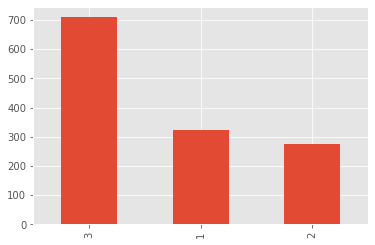

In [54]:
all_df.Pclass.value_counts().plot.bar()
plt.show() # 3등급 객실 이용자가 가장 많이 사망하였다.

In [55]:
# Pclass(객실 등급) 그룹에 대한 Fare(요금) 기술 통계
all_df[['Pclass', 'Fare']].groupby('Pclass').describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

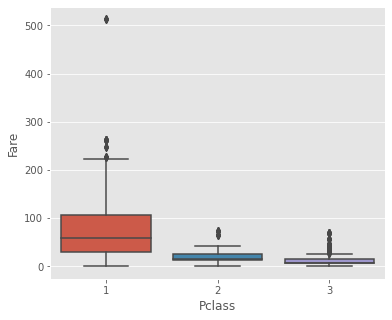

In [56]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Pclass', y='Fare', data=all_df)
plt.show() # 모든 결제 금액에서 일반적이지 않은 이상치가 존재함.

In [57]:
# 티켓 등급별 연령 분포의 확인
all_df[['Pclass', 'Age']].groupby('Pclass').describe()
# 1등석에 탑승한 승객의 평균 나이는 39세임, 최고령자는 80세임.
# 2등석에 탑승한 승객의 평균 나이는 29.5세임, 중간 나이는 29세임.

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       284.0  39.159930  14.548028  0.92  28.0  39.0  50.0  80.0
2       261.0  29.506705  13.638627  0.67  22.0  29.0  36.0  70.0
3       501.0  24.816367  11.958202  0.17  18.0  24.0  32.0  74.0

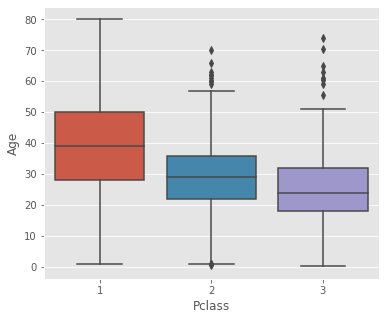

In [58]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Pclass', y='Age', data=all_df)
plt.show() # 2,3등 객실에서 이상치가 존재함.

In [59]:
# 영화 속 등장인물 기준으로 17세 이상을 대상으로 분석

In [60]:
cdt = (all_df['Age'] >= 17)
cdt

0        True
1        True
2        True
3        True
4        True
        ...  
1304    False
1305     True
1306     True
1307    False
1308    False
Name: Age, Length: 1309, dtype: bool

In [61]:
all_df[cdt].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df17 = all_df[cdt]
df17[['Pclass','Age']].groupby('Pclass').describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       273.0  40.320513  13.564349  17.0  30.0  39.0  50.0  80.0
2       231.0  32.510823  11.309235  17.0  24.0  30.0  39.0  70.0
3       408.0  28.618873   9.524762  17.0  21.0  26.0  33.0  74.0

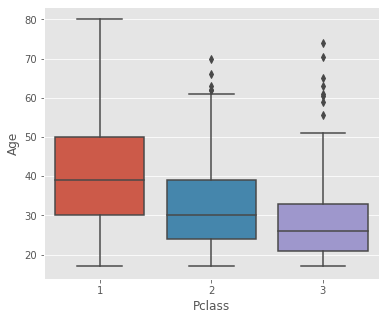

In [63]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Pclass', y='Age', data=df17)  # 상자 수염 그래프, 이상치 발견
plt.show() 

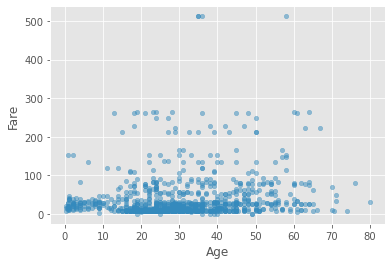

In [64]:
# 모든 연령과 승선 요금의 분포 확인
all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)
plt.show() # alpha: 겹쳐지는 마크는 진하게 출력됨.